In [1]:
# Notebook to view the classifications of reactions used for set of retrosynthetic routes

In [3]:
import pandas as pd
import json
import sys
import os
import ast

sys.path.append('../../../')

#import aizynthfinder.chem as chem
import aizynthfinder.analysis

from aizynthfinder.mcts.node import Node
from aizynthfinder.analysis import ReactionTree
from aizynthfinder.mcts.state import State
from aizynthfinder.chem import TreeMolecule
from aizynthfinder.context.collection import ContextCollection
from aizynthfinder.context.stock import StockException

from Maranga.utils.parse_multismiles import findkeys

In [4]:
file_ext = '/data/localhost/not-backed-up/mokaya/exscientia/'

In [15]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_results_std_opt4_2.hdf5'

data = pd.read_hdf(hdf_file, 'table')
solved_data = data.loc[(data.is_solved==True)]
reactions_1 = solved_data.trees.values

In [16]:
# file location of json file
json_file_1 = os.path.join(file_ext, 'aizynthfinder/Maranga/experiments/target_2/results/opt4_class/tg2_std_opt4_novelrxns.json')

with open(json_file_1) as f:
    data_1 = json.load(f)

data_1_r = data_1.get('reaction trees')
#data_1_r = [ast.literal_eval(i) for i in data_1_r]
reactions_1 = [json.loads(i) for i in data_1_r]

JSONDecodeError: Expecting value: line 1 column 459 (char 458)

In [7]:
 # file location of json file
json_file_2 = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_std_solved.json'

with open(json_file_2) as f:
    data_2 = json.load(f)

data_2_r = data_2.get('reaction trees')
reactions_2 = [json.loads(i) for i in data_2_r]

FileNotFoundError: [Errno 2] No such file or directory: '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_std_solved.json'

In [17]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_results_std_2.hdf5'

data_3 = pd.read_hdf(hdf_file, 'table')

solved_data_3 = data.loc[(data_3.is_solved==True)]
reactions_3 = solved_data_3.trees.values

In [18]:
# find classifications from list of reactio dicts and retuirn a dict with frequency
def count_reactions(rxns):
    templates = []
    templates_dict = {}
    for i in rxns:
        templates.extend(list(findkeys(i, 'classification')))

    print('# Templates: ', len(templates))

    for i in templates:
        if i in templates_dict:
            templates_dict[i] += 1
        else:
            templates_dict[i] = 1
    return templates_dict


In [19]:
templates_1 = count_reactions(reactions_1)
s_templates_1 = dict(sorted(templates_1.items(), key=lambda kv: kv[1], reverse=True))


# Templates:  854


In [24]:
templates_2 = count_reactions(reactions_2)
print(len(templates_2))
s_templates_2 = dict(sorted(templates_2.items(), key=lambda kv: kv[1], reverse=True))

# Templates:  1226
37


In [20]:
templates_3 = count_reactions(reactions_3)
print(len(templates_3))
s_templates_3 = dict(sorted(templates_3.items(), key=lambda kv: kv[1], reverse=True))

# Templates:  1199
27


In [21]:
for k, v in s_templates_1.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))

Unassigned      213       
Heteroaryl N-alkylation 168       
Reductive amination 119       
Halogenation    107       
RCO2H deprotections 82        
Other functional group interconversion 34        
Other reductions 32        
Friedel-Crafts reaction 13        
Alcohol to halide 11        
Acid to acid chloride 10        
N-arylation with Ar-X 9         
O-sulfonylation 8         
Amide to amine reduction 7         
S-substitution  7         
N-substitution with alkyl-X 5         
O-substitution  5         
NH deprotections 4         
Ketone to alcohol 4         
ROH deprotections 4         
O-containing heterocycle formation 3         
Other deprotections 3         
Nitro to amine reduction 2         
O-acylation to ester 2         
Alcohols to aldehydes 1         
N-acylation to amide 1         


In [22]:
for k, v in s_templates_3.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))

tem = s_templates_3.keys()
print(tem)


Unassigned      246       
Heteroaryl N-alkylation 189       
Reductive amination 132       
RCO2H deprotections 129       
Halogenation    107       
O-acylation to ester 57        
Other functional group interconversion 49        
Other reductions 47        
Alcohol to halide 32        
ROH deprotections 32        
O-substitution  28        
NH deprotections 23        
N-arylation with Ar-X 22        
Amide to amine reduction 16        
O-sulfonylation 14        
Friedel-Crafts reaction 13        
N-acylation to amide 11        
Alkene to alkane 11        
Acid to acid chloride 10        
S-substitution  7         
N-substitution with alkyl-X 5         
NH protections  5         
Other deprotections 4         
Ketone to alcohol 4         
O-containing heterocycle formation 3         
Nitro to amine reduction 2         
Alcohols to aldehydes 1         
dict_keys(['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to este

In [58]:
to_optimise_hash = []
for i in s_templates_2:
    if i not in s_templates_1:
        print(i)
        to_optimise_hash.append(i)

Dehydration


In [59]:
print(to_optimise_hash)
print('Length: ', len(to_optimise_hash))

['Dehydration']
Length:  1


In [60]:
print(s_templates_1)

{'Unassigned': 250, 'Heteroaryl N-alkylation': 201, 'Reductive amination': 158, 'Halogenation': 133, 'RCO2H deprotections': 110, 'Other functional group interconversion': 49, 'O-acylation to ester': 31, 'Amide to amine reduction': 27, 'Other reductions': 26, 'ROH deprotections': 20, 'O-substitution': 20, 'Alcohol to halide': 19, 'N-arylation with Ar-X': 18, 'Alcohols to aldehydes': 15, 'NH deprotections': 15, 'N-acylation to amide': 15, 'Friedel-Crafts reaction': 13, 'Ester to alcohol': 13, 'Stille reaction': 12, 'Acid to acid chloride': 11, 'Alkene oxidative cleavage': 9, 'S-substitution': 9, 'N-substitution with alkyl-X': 8, 'Ketone to alcohol': 8, 'O-sulfonylation': 7, 'Other functional group addition': 5, 'Nitro to amine reduction': 4, 'NH protections': 4, 'O-containing heterocycle formation': 3, 'Alkene to alkane': 3, 'Suzuki coupling': 2, 'Other deprotections': 2, 'Other organometallic C-C bond formation': 2, 'Cyano or imine to amine': 1, 'RSH deprotections': 1, 'Alkyne to alkane

In [61]:
s_total_1 = sum(list(s_templates_1.values()))
s_total_2 = sum(list(s_templates_2.values()))
print(s_total_1)
print(s_total_2)

1226
384


TypeError: unhashable type: 'slice'

In [62]:
for label, val in s_templates_1.items():
    prop = val / 1226
    for lab, v in s_templates_2.items():
        p = v / 1459
        if label == lab and p > prop:
            print(label)
            print('prop: ', prop)
            print('p: ', p)
            to_optimise_hash.append(label)
            print('')

Alcohol to halide
prop:  0.015497553017944535
p:  0.018505825908156272

O-containing heterocycle formation
prop:  0.0024469820554649264
p:  0.010966415352981495



In [63]:
print(to_optimise_hash)
print(len(to_optimise_hash))

['Dehydration', 'Alcohol to halide', 'O-containing heterocycle formation']
3


In [64]:
print(len(set(to_optimise_hash)))

3


[246, 189, 132, 129, 107, 57, 49, 47, 32, 32, 28, 23, 22, 16, 14, 13, 11, 11, 7, 5, 5, 4, 4, 3, 2]
[213, 168, 119, 107, 82, 34, 32, 13, 11, 9, 8, 7, 7, 5, 5, 4, 4, 4, 3, 3, 2, 2, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

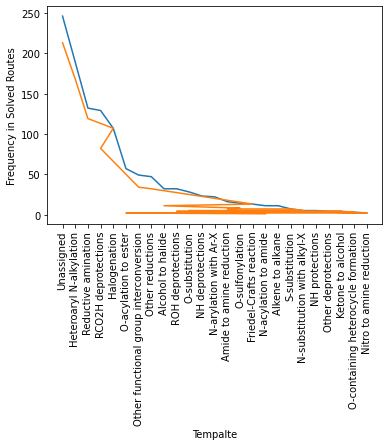

In [66]:
import matplotlib.pyplot as plt

temps = list(opt_s_templates_3.keys())
dc = list(opt_s_templates_3.values())

temps_1 = list(opt_s_templates_1.keys())
dc_1 = list(opt_s_templates_1.values())
print(dc)
print(dc_1)

plt.plot(temps, dc)
plt.plot(temps_1, dc_1)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Frequency in Solved Routes')
plt.show

In [58]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [70]:
opt_template_3 = {}
for k,v in s_templates_3.items():
    if k in opt_list:
        opt_template_3[k] = v

opt_s_templates_3 = dict(sorted(opt_template_3.items(), key=lambda kv: kv[1], reverse=True))

opt_template_1 = {}
for k,v in s_templates_1.items():
    if k in opt_list:
        opt_template_1[k] = v


for key in opt_o_temps:
    opt_template_1[key] = opt_template_1.pop(key)

print(len(opt_s_templates_3))


KeyError: 'Alkene to alkane'

In [69]:
o_temps=['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to ester', 'Other functional group interconversion', 'Other reductions', 'Alcohol to halide', 'ROH deprotections', 'O-substitution', 'NH deprotections', 'N-arylation with Ar-X', 'Amide to amine reduction', 'O-sulfonylation', 'Friedel-Crafts reaction', 'N-acylation to amide', 'Alkene to alkane', 'Acid to acid chloride', 'S-substitution', 'N-substitution with alkyl-X', 'NH protections', 'Other deprotections', 'Ketone to alcohol', 'O-containing heterocycle formation', 'Nitro to amine reduction', 'Alcohols to aldehydes']
opt_o_temps = [i for i in o_temps if i in opt_list]